In [607]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import time
import gmaps
import os
import json
from datetime import datetime

#Import api_key
from config import api_key
from config import g_key
import gmaps
import os

import scipy.stats as st

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
gmaps.configure(api_key=g_key)


In [583]:
! jupyter nbextension enable --py gmaps

Enabling notebook extension jupyter-gmaps/extension...
      - Validating: OK


## Generate Cities List

In [8]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
  

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        print(city)
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


kapaa
ajdabiya
tasiilaq
busselton
ushuaia
new norfolk
atuona
magadan
umm lajj
puerto ayora
cabo san lucas
ikalamavony
karpogory
cape town
hermanus
gumla
slave lake
belushya guba
la ronge
pisco
shushenskoye
rawson
carnarvon
azad shahr
mahon
milkovo
poum
staryy nadym
vestmannaeyjar
bethel
namatanai
we
punta arenas
castro
elk grove
nova vicosa
dunedin
saint george
barrow
longyearbyen
ribeira grande
lompoc
padang
torbay
jamestown
quatre cocos
saint anthony
hilo
butaritari
kaitangata
najran
poso
harer
mys shmidta
sentyabrskiy
saint-philippe
tome
saldanha
rath
nanortalik
qaanaaq
ostrovnoy
doka
ponta do sol
tura
cayenne
colares
salalah
peniche
egvekinot
tuktoyaktuk
yellowknife
astoria
bilma
albany
dikson
siilinjarvi
port hedland
gambela
avera
mataura
tuatapere
talnakh
sann
matara
half moon bay
benguela
luderitz
zyryanka
iguape
khatanga
vaitupu
nikolskoye
mar del plata
katsuura
bluff
uwayl
arawa
saint-pierre
folldal
rikitea
lagoa
luba
celestun
chuy
vaini
port alfred
faanui
hualmay
lolua
avarua

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [591]:
# Save API information by create the query url with units imperial for fahrenheit and api-key.
#The query string is going to end with &q= (to leave the city out and perform the for loop).

url = "http://api.openweathermap.org/data/2.5/weather?"
units= 'imperial'

# building a query url 
query_url = f"{url}appid={api_key}&units={units}&q="


# set up lists to hold reponse info
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
cityaccepted=[]

# Loop through the list of cities and perform a request for data on each, enter an if statement to leave out 
#cities that do not return any data

for ii, city in enumerate(cities):
    response = requests.get(query_url + city).json() 
    time.sleep(1)
    #do a request, pause for a second and then continue to run
#     print(response)

    
    if(response['cod'] == 200):
        print('Processing Record %d \t| City: \t %s'%( ii, city) )
        
        cityaccepted.append(city)
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    else:
        print(response)
#         lat.append(None)
#         lon.append(None)
#         max_temp.append(None)
#         humidity.append(None)
#         cloudiness.append(None)
#         wind_speed.append(None)
#         country.append(None)
#         date.append(None)
        print('missing city:', city)
    

Processing Record 0 	| City: 	 kapaa
Processing Record 1 	| City: 	 ajdabiya
Processing Record 2 	| City: 	 tasiilaq
Processing Record 3 	| City: 	 busselton
Processing Record 4 	| City: 	 ushuaia
Processing Record 5 	| City: 	 new norfolk
Processing Record 6 	| City: 	 atuona
Processing Record 7 	| City: 	 magadan
Processing Record 8 	| City: 	 umm lajj
Processing Record 9 	| City: 	 puerto ayora
Processing Record 10 	| City: 	 cabo san lucas
Processing Record 11 	| City: 	 ikalamavony
Processing Record 12 	| City: 	 karpogory
Processing Record 13 	| City: 	 cape town
Processing Record 14 	| City: 	 hermanus
Processing Record 15 	| City: 	 gumla
Processing Record 16 	| City: 	 slave lake
{'cod': '404', 'message': 'city not found'}
missing city: belushya guba
Processing Record 18 	| City: 	 la ronge
Processing Record 19 	| City: 	 pisco
Processing Record 20 	| City: 	 shushenskoye
Processing Record 21 	| City: 	 rawson
Processing Record 22 	| City: 	 carnarvon
Processing Record 23 	| C

Processing Record 188 	| City: 	 arraial do cabo
Processing Record 189 	| City: 	 hambantota
Processing Record 190 	| City: 	 yar-sale
Processing Record 191 	| City: 	 vardo
Processing Record 192 	| City: 	 kenitra
Processing Record 193 	| City: 	 zheleznodorozhnyy
{'cod': '404', 'message': 'city not found'}
missing city: ayer itam
Processing Record 195 	| City: 	 nemuro
Processing Record 196 	| City: 	 puerto quijarro
{'cod': '404', 'message': 'city not found'}
missing city: cam pha
Processing Record 198 	| City: 	 piacabucu
Processing Record 199 	| City: 	 kavaratti
Processing Record 200 	| City: 	 itarema
Processing Record 201 	| City: 	 astaneh-ye ashrafiyeh
Processing Record 202 	| City: 	 reconquista
Processing Record 203 	| City: 	 bengkulu
{'cod': '404', 'message': 'city not found'}
missing city: illoqqortoormiut
Processing Record 205 	| City: 	 port hardy
Processing Record 206 	| City: 	 chermoz
Processing Record 207 	| City: 	 provideniya
Processing Record 208 	| City: 	 hira

Processing Record 376 	| City: 	 canora
Processing Record 377 	| City: 	 chai nat
Processing Record 378 	| City: 	 bolshaya dzhalga
{'cod': '404', 'message': 'city not found'}
missing city: maghama
{'cod': '404', 'message': 'city not found'}
missing city: samusu
Processing Record 381 	| City: 	 tavistock
Processing Record 382 	| City: 	 yanliang
Processing Record 383 	| City: 	 mopipi
Processing Record 384 	| City: 	 caravelas
{'cod': '404', 'message': 'city not found'}
missing city: tumannyy
Processing Record 386 	| City: 	 lazaro cardenas
Processing Record 387 	| City: 	 archidona
Processing Record 388 	| City: 	 aloleng
Processing Record 389 	| City: 	 porto san giorgio
Processing Record 390 	| City: 	 tutoia
Processing Record 391 	| City: 	 roald
Processing Record 392 	| City: 	 nyurba
Processing Record 393 	| City: 	 hofn
Processing Record 394 	| City: 	 inhambane
Processing Record 395 	| City: 	 qaqortoq
Processing Record 396 	| City: 	 san alberto
Processing Record 397 	| City: 

Processing Record 559 	| City: 	 sitka
Processing Record 560 	| City: 	 nangomba
Processing Record 561 	| City: 	 pedro escobedo
Processing Record 562 	| City: 	 livani
Processing Record 563 	| City: 	 vila velha
Processing Record 564 	| City: 	 ixtapa
{'cod': '404', 'message': 'city not found'}
missing city: hihifo
Processing Record 566 	| City: 	 weatherford
Processing Record 567 	| City: 	 ambunti
Processing Record 568 	| City: 	 caninde
Processing Record 569 	| City: 	 faya
Processing Record 570 	| City: 	 roding
Processing Record 571 	| City: 	 qasigiannguit
Processing Record 572 	| City: 	 savannah bight
Processing Record 573 	| City: 	 isla mujeres
Processing Record 574 	| City: 	 rafai
Processing Record 575 	| City: 	 andros town
Processing Record 576 	| City: 	 taoudenni
Processing Record 577 	| City: 	 ambilobe
Processing Record 578 	| City: 	 atar
Processing Record 579 	| City: 	 gari
Processing Record 580 	| City: 	 chumikan
Processing Record 581 	| City: 	 erenhot
Processi

In [12]:
#Create a dictionary 

weather_dict = {'City': cityaccepted,
                'Lat': lat,
                'Long':lon,
                'Max_temp': max_temp,
                'Humidity': humidity,
                'Cloudiness': cloudiness, 
                'Wind_Speed': wind_speed,
                'Country': country, 
                'Date': date}

# Convert Raw Data to DataFrame
weather_df = pd.DataFrame(weather_dict)
weather_df

,City,Lat,Long,Max_temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,kapaa,22.08,-159.32,80.60,69,20,10.29,US,1609278711
1,ajdabiya,30.76,20.23,56.93,50,0,10.22,LY,1609278980
2,tasiilaq,65.61,-37.64,17.60,92,14,2.24,GL,1609278981
3,busselton,-33.65,115.33,64.00,74,25,3.00,AU,1609278651
4,ushuaia,-54.80,-68.30,55.40,37,20,9.17,AR,1609278661
...,...,...,...,...,...,...,...,...,...
558,oistins,13.07,-59.53,77.00,88,75,4.70,BB,1609279651
559,ipojuca,-8.40,-35.06,78.80,61,75,11.41,BR,1609279652
560,bandarbeyla,9.49,50.81,73.90,81,59,21.14,SO,1609279653
561,stornoway,58.21,-6.39,34.00,80,40,9.17,GB,1609279654


In [679]:
#Export the city data into a .csv.
# Output File (CSV)
weather_df.to_csv('weather_file.csv', encoding='utf-8', index=False)

In [14]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        563 non-null    object 
 1   Lat         563 non-null    float64
 2   Long        563 non-null    float64
 3   Max_temp    563 non-null    float64
 4   Humidity    563 non-null    int64  
 5   Cloudiness  563 non-null    int64  
 6   Wind_Speed  563 non-null    float64
 7   Country     563 non-null    object 
 8   Date        563 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 39.7+ KB


In [15]:
new_weather_df = weather_df.fillna(0)
new_weather_df

,City,Lat,Long,Max_temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,kapaa,22.08,-159.32,80.60,69,20,10.29,US,1609278711
1,ajdabiya,30.76,20.23,56.93,50,0,10.22,LY,1609278980
2,tasiilaq,65.61,-37.64,17.60,92,14,2.24,GL,1609278981
3,busselton,-33.65,115.33,64.00,74,25,3.00,AU,1609278651
4,ushuaia,-54.80,-68.30,55.40,37,20,9.17,AR,1609278661
...,...,...,...,...,...,...,...,...,...
558,oistins,13.07,-59.53,77.00,88,75,4.70,BB,1609279651
559,ipojuca,-8.40,-35.06,78.80,61,75,11.41,BR,1609279652
560,bandarbeyla,9.49,50.81,73.90,81,59,21.14,SO,1609279653
561,stornoway,58.21,-6.39,34.00,80,40,9.17,GB,1609279654


In [16]:
new_weather_df.shape

(563, 9)

In [17]:
#Humidity max is 100
new_weather_df.describe()

,Lat,Long,Max_temp,Humidity,Cloudiness,Wind_Speed,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,20.367318,21.425044,49.743890,74.825933,54.179396,8.524263,1.609279e+09
std,32.704250,90.788441,32.361905,17.005596,39.261938,6.073093,2.601237e+02
min,-54.800000,-179.170000,-53.810000,9.000000,0.000000,0.310000,1.609278e+09
25%,-5.615000,-58.100000,30.990000,66.000000,12.500000,3.635000,1.609279e+09
50%,23.170000,24.730000,61.410000,78.000000,62.000000,7.000000,1.609279e+09
75%,48.350000,102.495000,76.855000,87.000000,95.000000,12.145000,1.609279e+09
max,78.220000,179.320000,94.600000,100.000000,100.000000,37.110000,1.609280e+09


## Inspect the data and remove the cities where the humidity > 100%.

In [601]:
# Get the indices of cities that have humidity over 100%. 
new_weather_df[new_weather_df['Humidity'] > 100].index


Int64Index([], dtype='int64')

#### Make a new DataFrame equal to the city data to drop all humidity outliers.

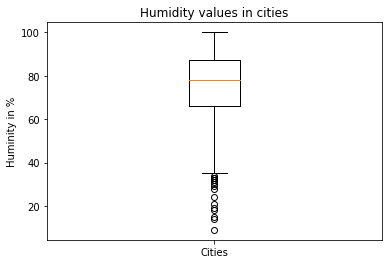

In [538]:

#Use an easy boxplot to see visually if there are are outliers. 
#I can see that there are multiple potential outliers in my humidity datapoints.

new_weather_df['Humidity']
plt.boxplot(new_weather_df['Humidity'])
plt.title('Humidity values in cities')
plt.ylabel('Huminity in %')
plt.xticks([1],['Cities'])
plt.show()

In [540]:
# Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers 
#in the column Humidity.
# Use pandas function to determin quartile = .quantile([0.25,0.5,0.75])
# determine 1st and 3rd quartiles, interquartile range, and median.
# determine lower and upper bound (the whiskers of my boxplot). All values outside are potential outliers.
# Find OUTLIERS

quartiles = new_weather_df['Humidity'].quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"Lower quartile of humidity : {lowerq}")
print(f"Upper quartile is: {upperq}")
print(f"Interquartile range is: {iqr}")
print(f"The median is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(lower_bound)
print(upper_bound)

Lower quartile of humidity : 66.0
Upper quartile is: 87.0
Interquartile range is: 21.0
The median is: 78.0 
34.5
118.5


In [21]:
# two ways to get a dataframe and outliers:
#1 way: appending index
index_to_retain = []

#iterrows to iterate over rows:
for index, city_row in new_weather_df.iterrows(): 

    if(city_row['Humidity'] >= upper_bound or city_row['Humidity'] <= lower_bound):
        print(city_row)
        index_to_retain.append(index)
        print('outlier')

        
new_weather_df[new_weather_df.index.isin(index_to_retain)]

City               bilma
Lat                18.69
Long               12.92
Max_temp           61.88
Humidity              28
Cloudiness             0
Wind_Speed          5.46
Country               NE
Date          1609279056
Name: 69, dtype: object
outlier
City             gambela
Lat                 8.25
Long               34.58
Max_temp           82.62
Humidity              33
Cloudiness             7
Wind_Speed          0.96
Country               ET
Date          1609279061
Name: 74, dtype: object
outlier
City              newton
Lat                42.34
Long              -71.21
Max_temp           30.99
Humidity              33
Cloudiness            17
Wind_Speed         14.99
Country               US
Date          1609278918
Name: 116, dtype: object
outlier
City               kutum
Lat                 14.2
Long               24.67
Max_temp           61.68
Humidity              32
Cloudiness             0
Wind_Speed          8.28
Country               SD
Date          1609279157
Nam

,City,Lat,Long,Max_temp,Humidity,Cloudiness,Wind_Speed,Country,Date
69,bilma,18.69,12.92,61.88,28,0,5.46,NE,1609279056
74,gambela,8.25,34.58,82.62,33,7,0.96,ET,1609279061
116,newton,42.34,-71.21,30.99,33,17,14.99,US,1609278918
154,kutum,14.20,24.67,61.68,32,0,8.28,SD,1609279157
245,tibati,6.47,12.63,71.01,29,25,4.05,CM,1609279281
247,viedma,-40.81,-63.00,91.00,24,25,5.01,AR,1609279283
326,hueypoxtla,19.91,-99.08,72.00,14,5,2.95,MX,1609279255
417,alice springs,-23.70,133.88,69.80,32,20,1.12,AU,1609279481
424,socorro,31.65,-106.30,59.00,33,5,13.87,US,1609279489
428,hays,30.05,-98.03,70.00,32,100,5.99,US,1609279494


In [599]:
##2 way:filtering
#I can see that there are the same results (so here I will take the index, not the whole dataframe, to get a different
#view)
new_weather_df[(new_weather_df['Humidity'] >= upper_bound) | (new_weather_df['Humidity'] <= lower_bound)].index

Int64Index([ 69,  74, 116, 154, 245, 247, 326, 417, 424, 428, 440, 498, 509,
            512, 518, 532, 534, 545],
           dtype='int64')

In [600]:
#Outlierd dataframe
outlier_df=new_weather_df[(new_weather_df['Humidity'] >= upper_bound) | (new_weather_df['Humidity'] <= lower_bound)]
outlier_df.reset_index(drop=True)

,City,Lat,Long,Max_temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,bilma,18.69,12.92,61.88,28,0,5.46,NE,1609279056
1,gambela,8.25,34.58,82.62,33,7,0.96,ET,1609279061
2,newton,42.34,-71.21,30.99,33,17,14.99,US,1609278918
3,kutum,14.20,24.67,61.68,32,0,8.28,SD,1609279157
4,tibati,6.47,12.63,71.01,29,25,4.05,CM,1609279281
5,viedma,-40.81,-63.00,91.00,24,25,5.01,AR,1609279283
6,hueypoxtla,19.91,-99.08,72.00,14,5,2.95,MX,1609279255
7,alice springs,-23.70,133.88,69.80,32,20,1.12,AU,1609279481
8,socorro,31.65,-106.30,59.00,33,5,13.87,US,1609279489
9,hays,30.05,-98.03,70.00,32,100,5.99,US,1609279494


In [23]:
#Subtract the outliers dataframe from the original dataframe 
no_outliers_df=pd.concat([new_weather_df, outlier_df]).drop_duplicates(keep=False).reset_index(drop=True)
no_outliers_df

,City,Lat,Long,Max_temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,kapaa,22.08,-159.32,80.60,69,20,10.29,US,1609278711
1,ajdabiya,30.76,20.23,56.93,50,0,10.22,LY,1609278980
2,tasiilaq,65.61,-37.64,17.60,92,14,2.24,GL,1609278981
3,busselton,-33.65,115.33,64.00,74,25,3.00,AU,1609278651
4,ushuaia,-54.80,-68.30,55.40,37,20,9.17,AR,1609278661
...,...,...,...,...,...,...,...,...,...
540,oistins,13.07,-59.53,77.00,88,75,4.70,BB,1609279651
541,ipojuca,-8.40,-35.06,78.80,61,75,11.41,BR,1609279652
542,bandarbeyla,9.49,50.81,73.90,81,59,21.14,SO,1609279653
543,stornoway,58.21,-6.39,34.00,80,40,9.17,GB,1609279654


In [24]:
no_outliers_df.shape

(545, 9)

In [648]:
#Select the date in the DataFrame through iloc and convert epoch time into a '%Y-%m-%d' format
date2plot = no_outliers_df.iloc[0,8]
date2plot = datetime.fromtimestamp(date2plot).strftime('%Y-%m-%d')
date2plot

'2020-12-29'

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

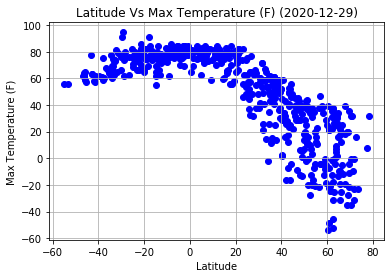

In [681]:
plt.scatter(no_outliers_df['Lat'],no_outliers_df['Max_temp'], c='blue')
plt.title(f'Latitude Vs Max Temperature (F) ({date2plot})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig('Lat vs Temperature')
plt.show()
#There is a strong relationship between latitude and temperature. 
#Looking at the plot, we can see that cities located in the Northern Emisphere (lat 0, 90) are experiencing lower temperatures (now in season Fall Winter), 
#while cities in the Southern emisphere higher temperatures related to their geographical position and season (-90, 0).
#Being in the Northern or Southern Emisphere and at which Lat. does play a crucial role in determining the temperature. 

## Latitude vs. Humidity Plot

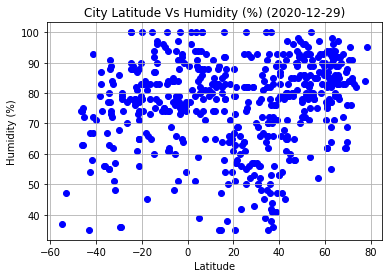

In [682]:
plt.scatter(no_outliers_df['Lat'],no_outliers_df['Humidity'], c='blue')
plt.title(f'City Latitude Vs Humidity (%) ({date2plot})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig('Lat vs Humidity Plot')
plt.show()

#From the plot, it can be seen than latitude affects Humidity, but not consistently. 
#Humidity in fact stays consistent along all degrees of latitude, even in summer time for the Southern Hemisphere.

## Latitude vs. Cloudiness Plot

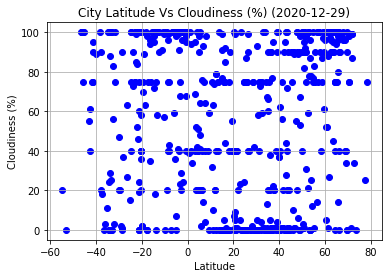

In [683]:
plt.scatter(no_outliers_df['Lat'],no_outliers_df['Cloudiness'], c='blue')
plt.title(f'City Latitude Vs Cloudiness (%) ({date2plot})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('Lat vs Cloudiness Plot')
plt.show()

#The two variable don't seem to be correlated. Anyway, it can be slighlty seen than clouds are less closer to the equator.

## Latitude vs. Wind Speed Plot

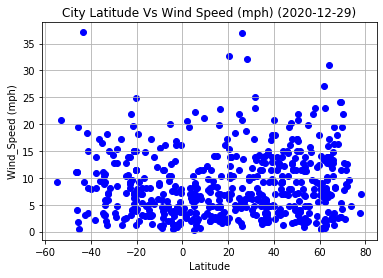

In [684]:
plt.scatter(no_outliers_df['Lat'],no_outliers_df['Wind_Speed'], c='blue')
plt.title(f'City Latitude Vs Wind Speed (mph) ({date2plot})')
plt.xlabel('Latitude')
plt.ylabel('Wind_Speed (mph)')
plt.grid()
plt.savefig('Lat vs Wind_Speed Plot')
plt.show()

#From the plot it can be seen that winds are not correlated to latitude.

## Linear Regression

In [29]:
Northern_Hemisphere_df =  no_outliers_df[no_outliers_df['Lat'] >= 0].reset_index(drop=True)
Northern_Hemisphere_df

,City,Lat,Long,Max_temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,kapaa,22.08,-159.32,80.60,69,20,10.29,US,1609278711
1,ajdabiya,30.76,20.23,56.93,50,0,10.22,LY,1609278980
2,tasiilaq,65.61,-37.64,17.60,92,14,2.24,GL,1609278981
3,magadan,59.57,150.80,-5.24,89,100,12.35,RU,1609278986
4,umm lajj,25.02,37.27,75.02,61,0,4.90,SA,1609278987
...,...,...,...,...,...,...,...,...,...
371,mamontovo,52.71,81.62,9.90,93,100,12.77,RU,1609279649
372,oistins,13.07,-59.53,77.00,88,75,4.70,BB,1609279651
373,bandarbeyla,9.49,50.81,73.90,81,59,21.14,SO,1609279653
374,stornoway,58.21,-6.39,34.00,80,40,9.17,GB,1609279654


In [30]:
Southern_Hemisphere_df =  no_outliers_df[no_outliers_df['Lat'] < 0].reset_index(drop=True)
Southern_Hemisphere_df

,City,Lat,Long,Max_temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,busselton,-33.65,115.33,64.00,74,25,3.00,AU,1609278651
1,ushuaia,-54.80,-68.30,55.40,37,20,9.17,AR,1609278661
2,new norfolk,-42.78,147.06,63.00,54,61,3.00,AU,1609278689
3,atuona,-9.80,-139.03,78.91,74,0,15.64,PF,1609278707
4,puerto ayora,-0.74,-90.35,84.20,54,40,16.11,EC,1609278784
...,...,...,...,...,...,...,...,...,...
164,oranjemund,-28.55,16.43,61.61,80,1,8.41,NA,1609279631
165,micheweni,-4.97,39.83,81.27,79,98,12.66,TZ,1609279639
166,ilebo,-4.32,20.58,70.34,91,100,0.38,CD,1609279646
167,chilca,-12.52,-76.74,71.60,83,90,13.87,PE,1609279648


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

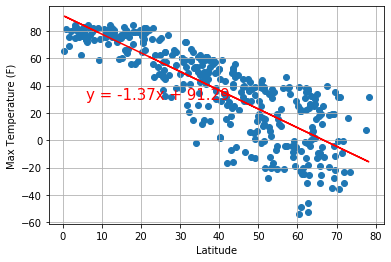

-0.8287155080486531

In [685]:
# Perform a linear regression on Latitude  vs. Max Temp (Northern Hemisfere) 

x_values = Northern_Hemisphere_df['Lat']
y_values = Northern_Hemisphere_df['Max_temp']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig('Lat vs Max Temp_North')
plt.show()

#the correlation coefficient: Negative correlation is a relationship between two variables 
#in which one variable increases as the other decreases, and vice versa. 
#In this case as the latitude goes up in the Northern Hemisphere, the temperature decreases. 
#Clearly the temperature is warmer as we get closer to the Equator.
#Rvalue is 0,84

rvalue

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

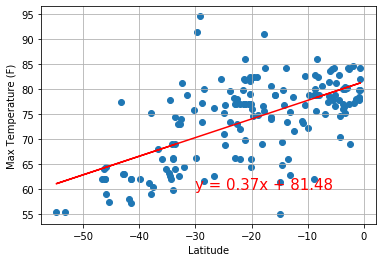

0.6172004912635644

In [686]:
# Perform a linear regression on Latitude  vs. Max Temp (Southern Hemisfere) 
x_values = Southern_Hemisphere_df['Lat']
y_values = Southern_Hemisphere_df['Max_temp']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig('Lat vs Max Temp_South')
plt.show()

rvalue

#positively correlated = both variables move in the same directions. 
#Therefore, one variable increases as the other variable increases, or one variable decreases while the other decreases. 
#Here, the temperature increases as the latitude goes up in values, meaning we are going close to the Equator. As we go close to the Equator, the temperature
#gets warmer. In the southern hemisphere the latitude goes from -90 to 0. 


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

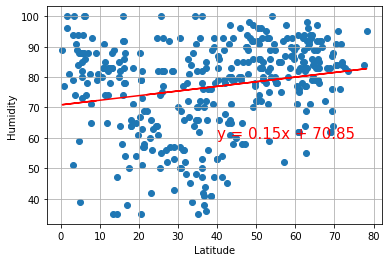

0.20299656194638246

In [687]:
x_values = Northern_Hemisphere_df['Lat']
y_values = Northern_Hemisphere_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.savefig('Northern_Humidity vs Latitude')
plt.show()

rvalue

#Slightly positive correlated, but not very much influenced by latitude

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

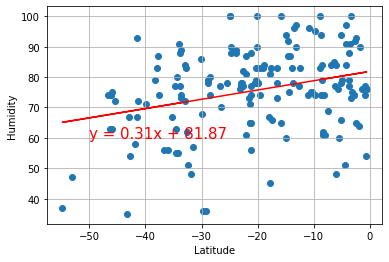

0.30435729261584965

In [688]:
x_values = Southern_Hemisphere_df['Lat']
y_values = Southern_Hemisphere_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.savefig('Southern_Humidity vs Latitude')
plt.show()

rvalue

#Slightly positive correlated: as we go closer to the Equator, the humidity grows 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

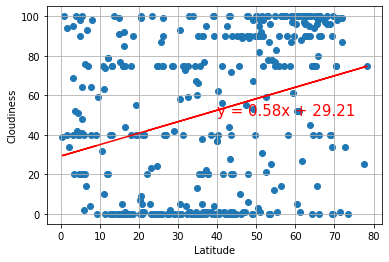

0.29774367664535095

In [689]:
x_values = Northern_Hemisphere_df['Lat']
y_values = Northern_Hemisphere_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.savefig('Northern_Cloudiness vs Latitude')
plt.show()

rvalue

# slighly correlated but clouds are present at every latitude in the northern hemisphere

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

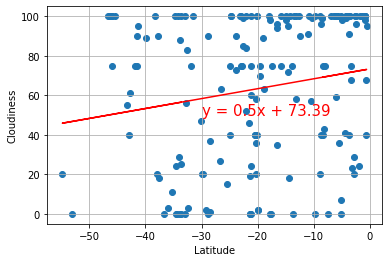

0.18056616962622152

In [690]:
x_values = Southern_Hemisphere_df['Lat']
y_values = Southern_Hemisphere_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.savefig('Southern_Cloudiness vs Latitude')
plt.show()

rvalue

#more clouds in the sourthern hemisphere as we reach the Equator

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

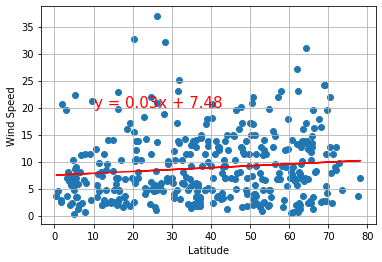

0.11135048927460266

In [691]:
x_values = Northern_Hemisphere_df['Lat']
y_values = Northern_Hemisphere_df['Wind_Speed']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.savefig('Northern_Wind Speed vs Latitude')
plt.show()

rvalue

#Not correlated

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

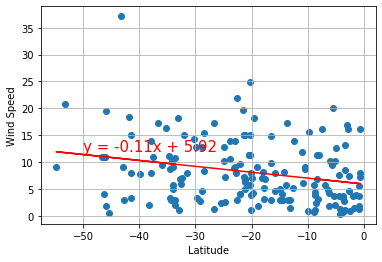

-0.25278446560039763

In [692]:
x_values = Southern_Hemisphere_df['Lat']
y_values = Southern_Hemisphere_df['Wind_Speed']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.savefig('Southern_Wind Speed vs Latitude')
plt.show()

rvalue

#Looking at the plots of the winds, I would say that the two variables are not correlated to each other. winds seems
#follow other rules than latitude

## Heatmap of Humidity of ALL cities

In [81]:
#Load the dataframe created in the first part of the project 
no_outliers_df

,City,Lat,Long,Max_temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,kapaa,22.08,-159.32,80.60,69,20,10.29,US,1609278711
1,ajdabiya,30.76,20.23,56.93,50,0,10.22,LY,1609278980
2,tasiilaq,65.61,-37.64,17.60,92,14,2.24,GL,1609278981
3,busselton,-33.65,115.33,64.00,74,25,3.00,AU,1609278651
4,ushuaia,-54.80,-68.30,55.40,37,20,9.17,AR,1609278661
...,...,...,...,...,...,...,...,...,...
540,oistins,13.07,-59.53,77.00,88,75,4.70,BB,1609279651
541,ipojuca,-8.40,-35.06,78.80,61,75,11.41,BR,1609279652
542,bandarbeyla,9.49,50.81,73.90,81,59,21.14,SO,1609279653
543,stornoway,58.21,-6.39,34.00,80,40,9.17,GB,1609279654


In [709]:
#create a weighted heatmap that comprises all cities and humidity values depending on the weight. 
#Adding a non dissipating value for the zoom
fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(no_outliers_df[['Lat', 'Long']], 
                                    weights=no_outliers_df['Humidity'],dissipating=False, 
                                    max_intensity=100, point_radius=3.0)

In [710]:
# Add the layer on the map
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

## Hotel Map


Store into variable named hotel_df.
Add a "Hotel Name" column to the DataFrame.
Set parameters to search for hotels with 5000 meters.
Hit the Google Places API for each city's coordinates.
Store the first Hotel result into the DataFrame.
Plot markers on top of the heatmap.

In [711]:

#Create new DataFrame fitting weather criteria by narrow down the cities to fit weather conditions.
#Drop any rows will null values (there are no null value, it can be seen on the dataframe, but also with isnull()).
ideal_cities_df = no_outliers_df[(no_outliers_df['Max_temp'] > 30) & (no_outliers_df['Max_temp'] < 95) & 
               (no_outliers_df['Humidity'] < 100) & (no_outliers_df['Wind_Speed'] < 80) & 
               (no_outliers_df['Cloudiness'] < 100) & 
               (no_outliers_df['Lat'] > 30 ) & (no_outliers_df['Lat'] < 60) &
                (no_outliers_df['Long'] > 0) & (no_outliers_df['Long'] < 55)].reset_index(drop=True)
                  
ideal_cities_df  

,City,Lat,Long,Max_temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,ajdabiya,30.76,20.23,56.93,50,0,10.22,LY,1609278980
1,azad shahr,34.79,48.57,34.41,82,13,1.32,IR,1609279003
2,mahon,39.89,4.27,51.80,53,37,9.17,ES,1609279004
3,margate,51.38,1.39,39.00,83,90,4.00,GB,1609279106
4,irbil,36.19,44.01,49.03,47,0,3.38,IQ,1609279121
5,jadu,31.95,12.03,49.17,48,4,13.35,LY,1609279151
6,mao,39.89,4.27,51.80,53,37,9.17,ES,1609279004
7,frunzivka,47.33,29.75,45.03,90,55,8.01,UA,1609279160
8,hit,33.64,42.83,53.19,39,0,7.09,IQ,1609279174
9,astaneh-ye ashrafiyeh,37.26,49.94,44.91,83,95,1.79,IR,1609279195


In [712]:
ideal_cities_df.shape

(30, 9)

In [713]:
#Use Google Places to find the first hotel for each city located in a 5000 meter radius of my coordinates

#create empty lists where to store my datapoint recovered through my APIs calls

type_of_business = []
name_hotel = []
city = []

#setting geocoordinates
target_radius = 5000
target_type = "lodging"
    


#Use the lat/long we have already identified
for index, row in ideal_cities_df.iterrows():
    
    lat_data = row['Lat']
    long_data = row['Long']
    target_location =  str(lat_data) + ', ' + str(long_data)

    #set the params dictionary to construct url and update each iteration
    params = {
        "location": target_location,
        "radius": target_radius,
        "type": target_type,
        "key": g_key}
    

# get my params into the query string and run the request
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    response = requests.get(base_url, params)
    place_data = response.json()

    if(len(place_data['results']) >0 ):
        type_of_business.append(place_data['results'][0]['types'][0])
        name_hotel.append(place_data['results'][0]['name'])
        city.append(place_data['results'][0]['vicinity'].split(',')[-1].strip(' '))


In [714]:
hotel_dict = {
    'Hotel_Name' : name_hotel, 
     "Business Type" :type_of_business,
    "City": city
}
data_hotel=pd.DataFrame(hotel_dict)
hotel_df =data_hotel[data_hotel['Business Type'] == 'lodging']
hotel_df['City']

0                        شارع بن عيسى، إجدابيا،
1                                  Unnamed Road
3                                       Margate
4                                         Erbil
5                                         جادو،
7                              حي المعلمين، هيت
8                         Astaneh-ye Ashrafiyeh
9                                  Svietlahorsk
12                          Falconara Marittima
14    Orta Mah. Barbaros Caddesi No:119 Finke 1
15                                   Navahrudak
16                                         Брдо
17                                    Il-Munxar
18                            Porto San Giorgio
19                                  Montpellier
20                                         Asău
21                                        Zadar
23                      El Corniche Street Qesm
24                        Saint Leonards-on-sea
25                                       Roding
Name: City, dtype: object

In [715]:
ideal_cities_df['City']=ideal_cities_df['City'].str.title()
ideal_cities_df['City']

0                  Ajdabiya
1                Azad Shahr
2                     Mahon
3                   Margate
4                     Irbil
5                      Jadu
6                       Mao
7                 Frunzivka
8                       Hit
9     Astaneh-Ye Ashrafiyeh
10              Svetlogorsk
11                 Pozorice
12                Salamiyah
13      Falconara Marittima
14                    Brcko
15                  Kumluca
16                 Sidi Ali
17               Navahrudak
18               Nova Varos
19              San Lawrenz
20         Bolshaya Dzhalga
21        Porto San Giorgio
22                   Lattes
23                     Asau
24                    Zadar
25               Privolnaya
26              Cascioarele
27             Marsa Matruh
28                 Hastings
29                   Roding
Name: City, dtype: object

In [716]:
#Merged the 2 dataframes on City
merged_df=pd.merge(hotel_df,ideal_cities_df, on = 'City')
merged_df

,Hotel_Name,Business Type,City,Lat,Long,Max_temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Premier Inn Margate hotel,lodging,Margate,51.38,1.39,39.00,83,90,4.00,GB,1609279106
1,Touring Hotel,lodging,Falconara Marittima,43.62,13.40,51.80,71,40,6.93,IT,1609279289
2,Hotel Grazhina,lodging,Navahrudak,53.60,25.83,34.50,89,0,13.96,BY,1609279324
3,David Palace Hotel,lodging,Porto San Giorgio,43.18,13.79,48.99,61,28,8.99,IT,1609279416
4,Hotel Kolovare,lodging,Zadar,44.12,15.24,55.40,58,20,14.99,HR,1609279520
5,City Hotel Roding,lodging,Roding,49.20,12.52,33.01,97,67,4.05,DE,1609279614


In [717]:
# Using the template add the hotel marks to the heatmap
fig = gmaps.figure()
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel_Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""

hotel_info = [info_box_template.format(**row) for index, row in merged_df.iterrows()]

#Create hotel layer on a map
marker_locations = merged_df[['Lat', 'Long']]

In [718]:
#add marker layer on top of the heat map 
marker_layer = gmaps.marker_layer(marker_locations, info_box_content=hotel_info)
fig.add_layer(marker_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [719]:
# Create a combined map
fig = gmaps.figure()
fig.add_layer(heatmap_layer)
fig.add_layer(marker_layer)
fig

Figure(layout=FigureLayout(height='420px'))